## Importing Modules and Loading Image

In [1]:
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np

In [2]:
# load an image for task 1 and task 2
coin_image = ski.io.imread(fname='images/coins.png')

# Q1: Histogram Computation

In [3]:
# Creating Histogram Data
def Histogram(image):
    imgShape = image.shape
    histoArray = np.zeros((256,), dtype=int)
    for i in range(imgShape[0]):
    	for j in range(imgShape[1]):
    		histoArray[image[i,j]] += 1
    return histoArray

histoArray = Histogram(coin_image)

# Histogram using Function
histogram, bin_edges = np.histogram(coin_image, bins=256, range=(0,256))

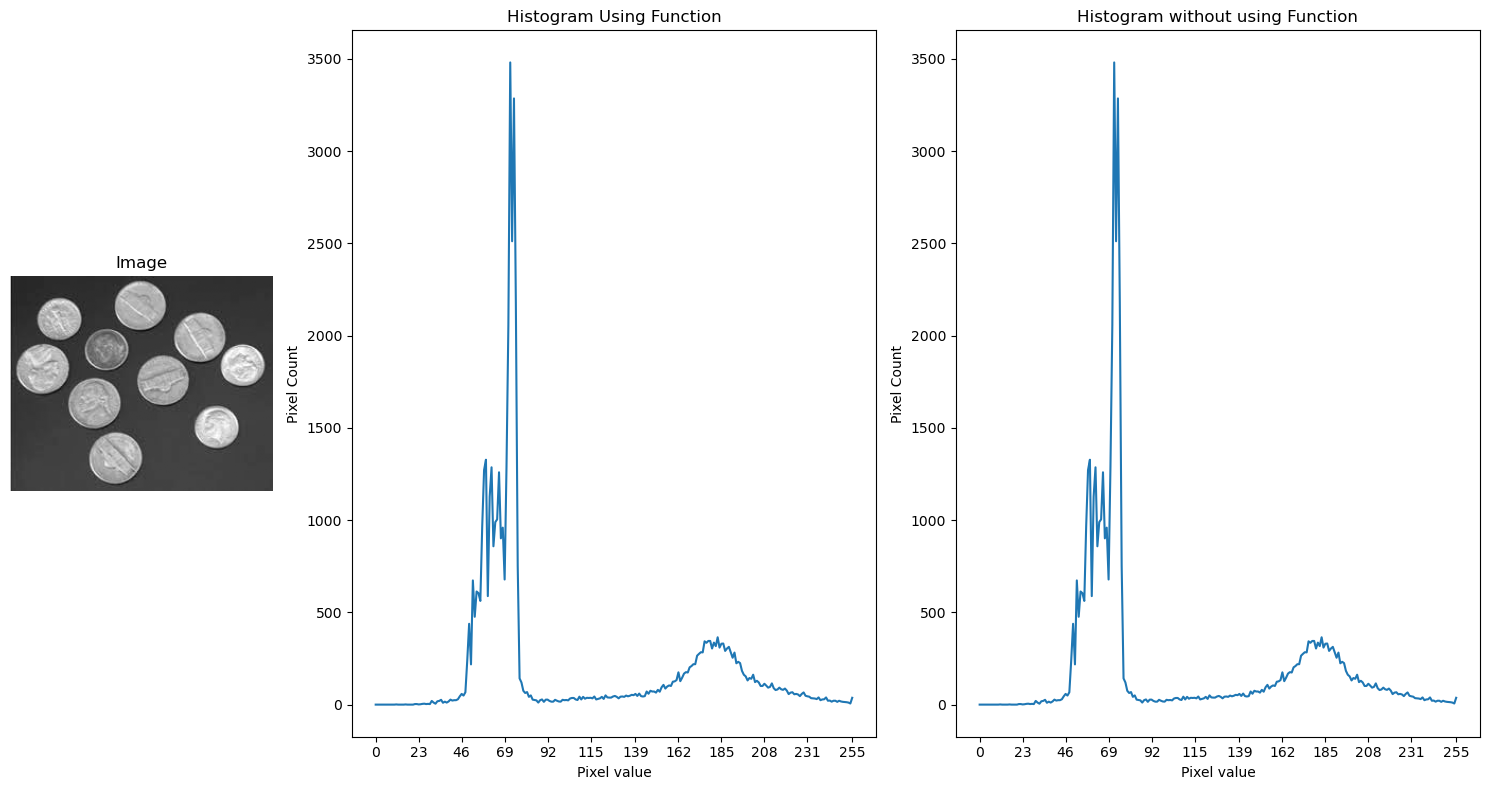

In [4]:
# Plotting everything
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,8), gridspec_kw={'width_ratios':[1,2,2]})
axes[0].imshow(coin_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Image')
axes[1].plot(histogram)
axes[1].set_xticks(np.linspace(0, 255, num=12, dtype=int))
axes[1].set_title('Histogram Using Function')
axes[1].set_xlabel('Pixel value')
axes[1].set_ylabel('Pixel Count')
axes[2].plot(histoArray)
axes[2].set_xticks(np.linspace(0, 255, num=12, dtype=int))
axes[2].set_title('Histogram without using Function')
axes[2].set_xlabel('Pixel value')
axes[2].set_ylabel('Pixel Count')
fig.tight_layout()
plt.show()

In [5]:
# Average Intensity of the image
mean = 0
for i in range(256):
    mean += i*histoArray[i]
mean /= coin_image.shape[0]*coin_image.shape[1]
print("Mean Intensity of the image using the histogram is:", mean)
print("Mean Intensity of the image using NumPy is:", np.mean(coin_image))
print("VERIFIED")

Mean Intensity of the image using the histogram is: 103.30500158906722
Mean Intensity of the image using NumPy is: 103.30500158906722
VERIFIED


# Q2 Otsu's Binarization

### 2.a) By minimizing the intra class variance

In [6]:
def withinClassVar(image, t):
    histo = Histogram(image)
    histo_norm = histo / np.sum(histo)
    w0 = np.sum(histo_norm[:t+1])
    w1 = 1 - w0
    
    #error control divide by 0
    if w0 == 0 or w1 == 0:
        return float('inf')
        
    imgMeanArr = np.arange(histo_norm.shape[0]) * histo_norm
    mean_0 = np.sum(imgMeanArr[:t+1]) / w0
    mean_1 = np.sum(imgMeanArr[t+1:]) / w1
    weighted_var_0 = np.sum(((np.arange(t+1) - mean_0)**2) * histo_norm[:t+1])
    weighted_var_1 = np.sum(((np.arange(t+1,histo_norm.shape[0]) - mean_1)**2) * histo_norm[t+1:])
    intra_var = weighted_var_0 + weighted_var_1
    return intra_var

In [7]:
optimal_t, min_weighted_var = 0, float('inf')
for t in range(256):
    intra_var = withinClassVar(coin_image, t)
    if intra_var < min_weighted_var:
        min_weighted_var = intra_var
        optimal_t = t
print("Optimal threshold which minimizes the Intra-Class Variance is: ", optimal_t)

Optimal threshold which minimizes the Intra-Class Variance is:  125


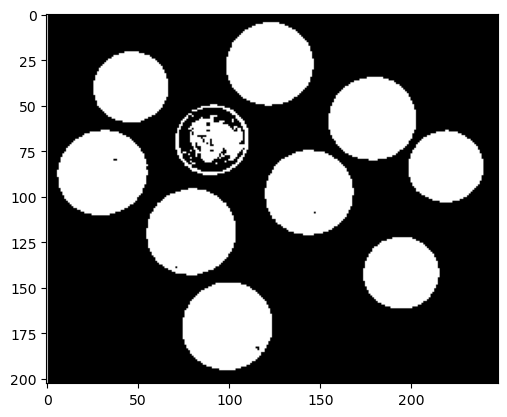

In [8]:
# Binarizing the image
def showBinImage(image, threshold):
    bin_img = image.copy()
    for i in range(bin_img.shape[0]):
        for j in range(bin_img.shape[1]):
            if bin_img[i][j] <= threshold:
                bin_img[i][j] = 0
            else:
                bin_img[i][j] = 255
    return bin_img

#Plotting the binarized image
plt.imshow(showBinImage(coin_image, 125), cmap='gray')
plt.show()

### 2.b) Creating a new image and binarizing it by maximizing the inter class variance

In [9]:
#Creating the new Image from the original Image
offset = 20
new_img = coin_image.copy()
max_pixel = max(new_img.flatten())
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        new_img[i][j] = max_pixel if new_img[i][j] >= max_pixel - offset else new_img[i][j] + offset

In [10]:
def betweenClassVar(image, t, zero_pad_freq=0):
    histo = Histogram(image)
    
    # if zero padding is required
    if zero_pad_freq > 0:
        histo[0] += zero_pad_freq
    
    histo_norm = histo / np.sum(histo)
    w0 = np.sum(histo_norm[:t+1])
    w1 = 1 - w0
    
    #error control divide by 0
    if w0 == 0 or w1 == 0:
        return float('-inf')
        
    imgMeanArr = np.arange(histo_norm.shape[0]) * histo_norm
    mean_0 = np.sum(imgMeanArr[:t+1]) / w0
    mean_1 = np.sum(imgMeanArr[t+1:]) / w1
    # inter_var = (w0 * ((mean_0 - image_mean) ** 2)) + (w1 * ((mean_1 - image_mean) ** 2))
    inter_var = w0 * w1 * ((mean_0 - mean_1) ** 2)
    return inter_var

In [11]:
def findThreshold(image, zero_pad_freq=0):
    optimal_t, max_weighted_var = 0, float('-inf')
    for t in range(256):
        inter_var = betweenClassVar(image, t, zero_pad_freq)
        if inter_var > max_weighted_var:
            max_weighted_var = inter_var
            optimal_t = t
    return optimal_t
print("Optimal threshold which maximizes the Inter-Class Variance is: ", findThreshold(new_img))

Optimal threshold which maximizes the Inter-Class Variance is:  145


### Result: Comparing the results between new and original Image

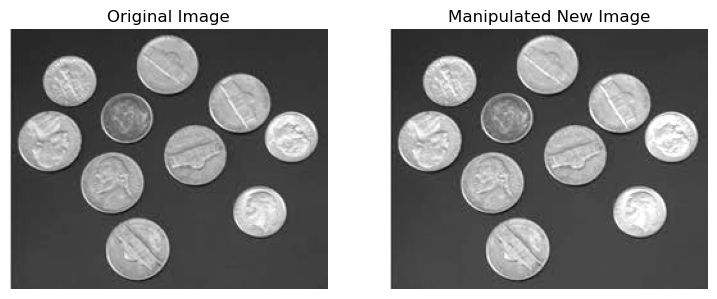

In [12]:
# Showing the new Created Image
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
axes[0].imshow(coin_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(new_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Manipulated New Image')
plt.show()

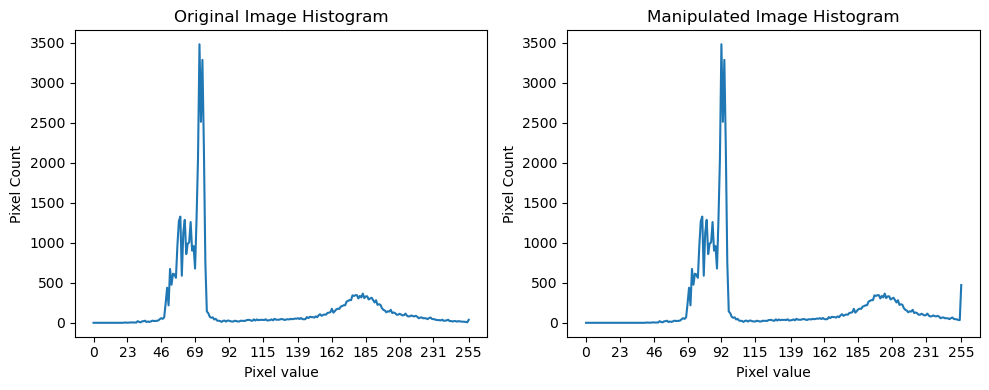

In [13]:
# Plotting and comparing Histogram
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].plot(Histogram(coin_image))
axes[0].set_xticks(np.linspace(0, 255, num=12, dtype=int))
axes[0].set_title('Original Image Histogram')
axes[0].set_xlabel('Pixel value')
axes[0].set_ylabel('Pixel Count')
axes[1].plot(Histogram(new_img))
axes[1].set_xticks(np.linspace(0, 255, num=12, dtype=int))
axes[1].set_title('Manipulated Image Histogram')
axes[1].set_xlabel('Pixel value')
axes[1].set_ylabel('Pixel Count')
fig.tight_layout()
plt.show()

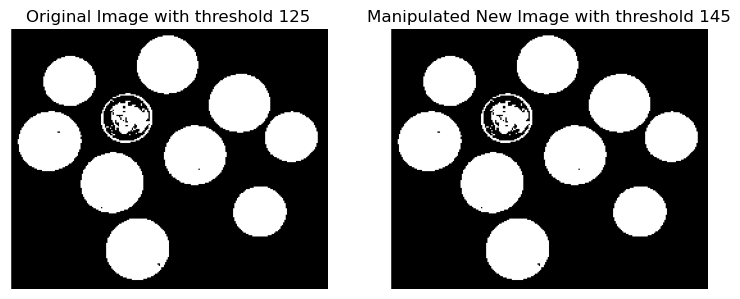

In [14]:
# Comparing the Binary images of both Original and New
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
axes[0].imshow(showBinImage(coin_image, 125), cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image with threshold 125')
axes[1].imshow(showBinImage(new_img, 145), cmap='gray')
axes[1].axis('off')
axes[1].set_title('Manipulated New Image with threshold 145')
plt.show()

# Q3 Adaptive Binarization

In [15]:
# load an image
sud_image = ski.io.imread(fname='images/sudoku.png')

In [16]:
# Main Function for the Adaptive Binarization
def adaptiveBinarization(image, win_size = None):
    if not win_size:
        win_size = image.shape[0]
    image_h, image_w = image.shape[0], image.shape[1]
    stride = int(win_size * 0.8)

    # It will take the vote of all the windows and count the number of windows
    vote_matrix = np.zeros((image.shape[0], image.shape[1]), dtype=int)
    win_count = np.zeros((image.shape[0], image.shape[1]), dtype=int)

    # main code
    for i in range(0, image_h, stride):
        for j in range(0, image_w, stride):
    
            #calculating padding pixels
            pixels_covered = min(image_w - j, win_size) * min(image_h - i, win_size)
            pixels_window = win_size ** 2
            pad_pixels = 0
            if (pixels_covered < pixels_window):
                pad_pixels = pixels_window - pixels_covered
    
            # dividing the image to the sub_images
            y2 = min(j + win_size, image_w)
            x2 = min(i + win_size, image_h)
            sub_image = image[i:x2, j:y2]
            sub_image_threshold = findThreshold(sub_image, zero_pad_freq = pad_pixels)
    
            #increasing the windows_count for the pixels
            win_count[i:x2, j:y2] += 1
    
            #taking the vote of the pixels
            for k in range(i, x2):
                for l in range(j, y2):
                    if image[k,l] > sub_image_threshold:
                        vote_matrix[k,l] += 1

    # Creating the new Binarized Image
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if vote_matrix[i,j] > (win_count[i,j] // 2):
                new_image[i,j] = 1
    return new_image

In [17]:
# Generating the Binarized image for different window sizes

# A) for 5x5 window
new_bin_image_5 = adaptiveBinarization(sud_image, win_size=5)

# B) For 10x10 window
new_bin_image_10 = adaptiveBinarization(sud_image, win_size=10)

# C) For 25x25 window
new_bin_image_25 = adaptiveBinarization(sud_image, win_size=25)

# D) For 50x50 window
new_bin_image_50 = adaptiveBinarization(sud_image, win_size=50)

# E) For Full image
new_bin_image_full = adaptiveBinarization(sud_image)

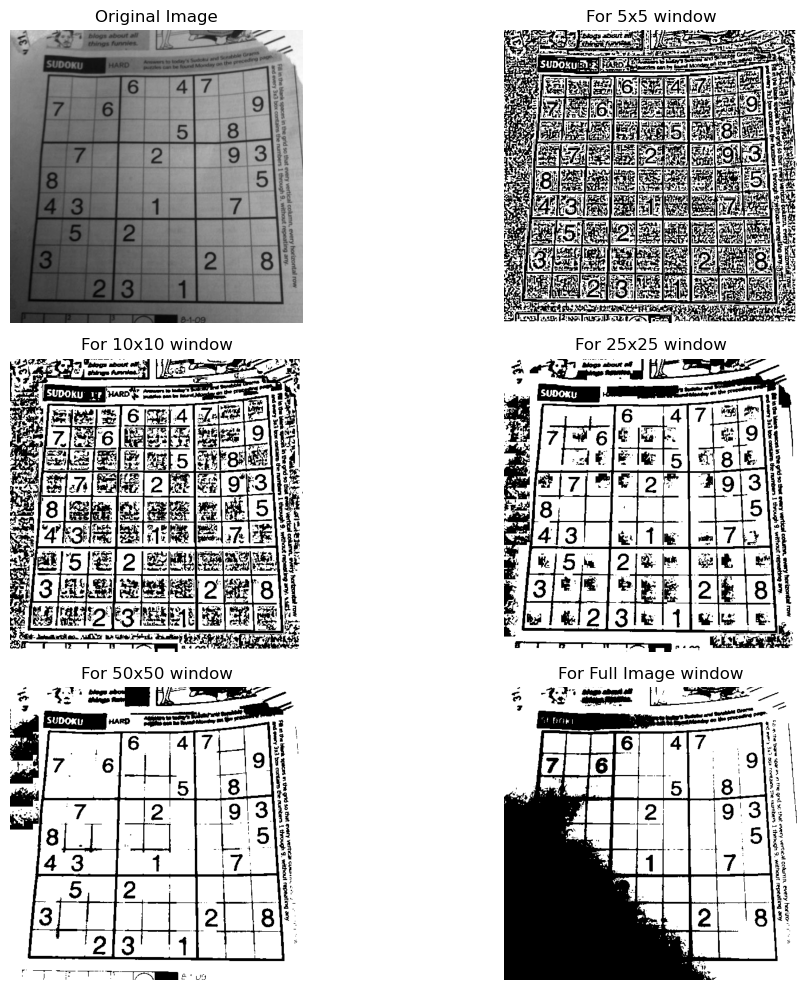

In [18]:
# Plotting everything
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
axes[0,0].imshow(sud_image, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Original Image')
axes[0,1].imshow(new_bin_image_5, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('For 5x5 window')
axes[1,0].imshow(new_bin_image_10, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('For 10x10 window')
axes[1,1].imshow(new_bin_image_25, cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title('For 25x25 window')
axes[2,0].imshow(new_bin_image_50, cmap='gray')
axes[2,0].axis('off')
axes[2,0].set_title('For 50x50 window')
axes[2,1].imshow(new_bin_image_full, cmap='gray')
axes[2,1].axis('off')
axes[2,1].set_title('For Full Image window')
fig.tight_layout()
plt.show()

# Q4 Connected Component

In [19]:
# load the image
quote_image = ski.io.imread(fname='images/quote.png')

In [20]:
# main Function for connected components
def getLargestCharacter(image):
    optimal_t = findThreshold(image)
    image_bin = np.zeros(image.shape)
    image_bin[image > 142] = 255                              
    inv_image_bin = 255 - image_bin                                  #making black bg and white fg

    image_h, image_w = inv_image_bin.shape
    nbr_template = np.array([[-1,-1], [-1, 0], [-1, 1], [0, -1]])    # necessary relative index of the neighbours
    labels = np.zeros(inv_image_bin.shape, dtype=np.int64)
    nx_label = 1
    for i in range(image_h):
        for j in range(image_w):
            if inv_image_bin[i,j] == 255:
                nbr_list = np.clip(nbr_template + np.array([[i,j]]), 0, image_w - 1)    #getting the index of the neighbour pixels around (i,j)
                row_n, col_n = nbr_list[:, 0], nbr_list[:, 1]
                nbr_labels = np.delete(np.unique(labels[row_n, col_n]), 0)       # removing the 0 label at 0 index of the sorted np array
                
                if not nbr_labels.size:                             # neighbours are all unlabeled
                    labels[i,j] = nx_label
                    nx_label += 1
                elif nbr_labels.size == 1:                     # means only one non zero label is there
                    labels[i,j] = nbr_labels[0]
                else:                                          # means more than one non-zero label is there
                    par_label = min(nbr_labels)
                    labels[i,j] = par_label
                    for lbl in nbr_labels:                     # changing the pixels with other labels to the one of the parent label
                        if lbl != par_label:
                            labels[labels == lbl] = par_label
    
    label_count = np.bincount(labels.ravel())               #Counting the number of pixels which have the same label value
    if label_count.size > 1:
        label_count[0] = 0                                  
    lar_char_idx = np.argmax(label_count)
    color_quote = np.stack([image, image, image], axis=2)          #Creating colored image out of grayscale image
    color_quote[labels == lar_char_idx] = [255,0,0]
    return color_quote

In [21]:
new_img = getLargestCharacter(quote_image)

Text(0.5, 1.0, 'New Manipulated Image')

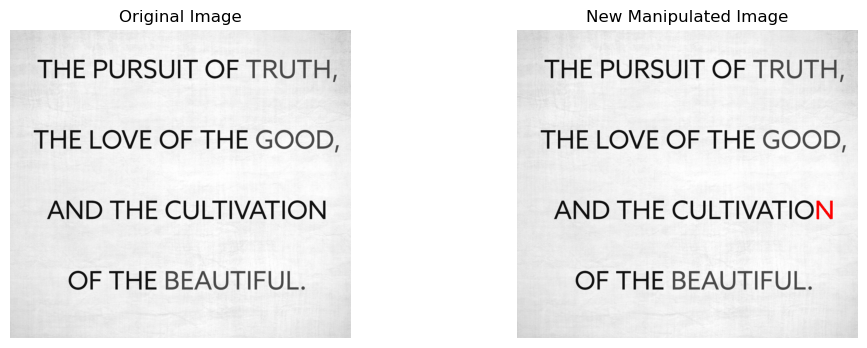

In [22]:
# Plotting everything
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].imshow(quote_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(new_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('New Manipulated Image')